In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plotReward(folder_name):
  def getAllFromDict(key, listOfDicts):
    return [d[key] for d in listOfDicts]

  RESULTS_PATH = '/home/sam/ray_results'
  file = open(f"{RESULTS_PATH}/{folder_name}/result.json", "r")

  results = []
  for line in file:
    results.append(json.loads(line))
    
  file.close()
  
  history = []

  for epoch in results:
    epoch_data = {}
    
    sampler = epoch['sampler_results']
    sampler_keys = ['episode_reward_max', 'episode_reward_min','episode_reward_mean']
    for key in sampler_keys:
      epoch_data[key] = sampler[key]
    epoch_data["episode_reward_max"] = sampler['episode_reward_max']
    
    history.append(epoch_data)
  
  plt.plot(getAllFromDict('episode_reward_min', history), label="min reward")
  plt.plot(getAllFromDict('episode_reward_mean', history), label="mean reward")
  plt.plot(getAllFromDict('episode_reward_max', history), label="max reward")
  plt.legend(bbox_to_anchor=(1,1))
  plt.xlabel("Epoch")
  plt.ylabel("Reward")
  plt.title(folder)
  plt.show()


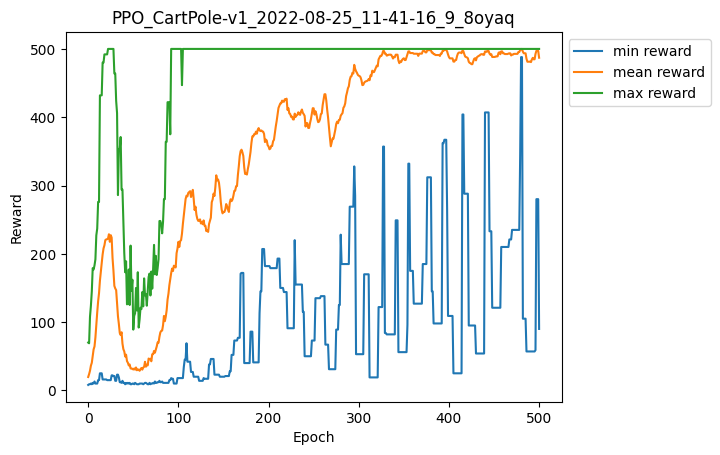

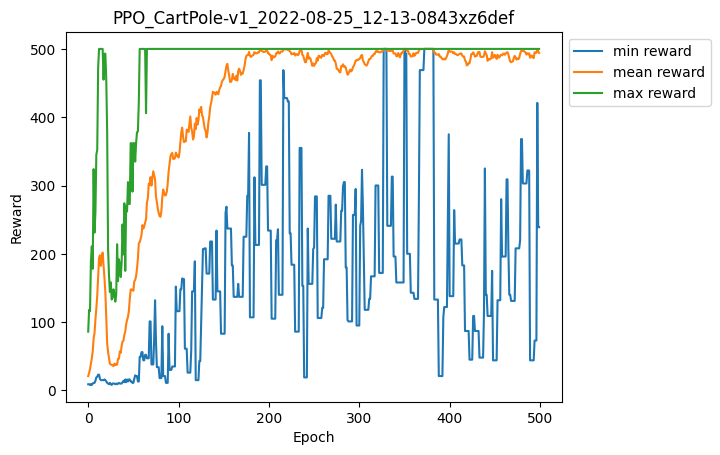

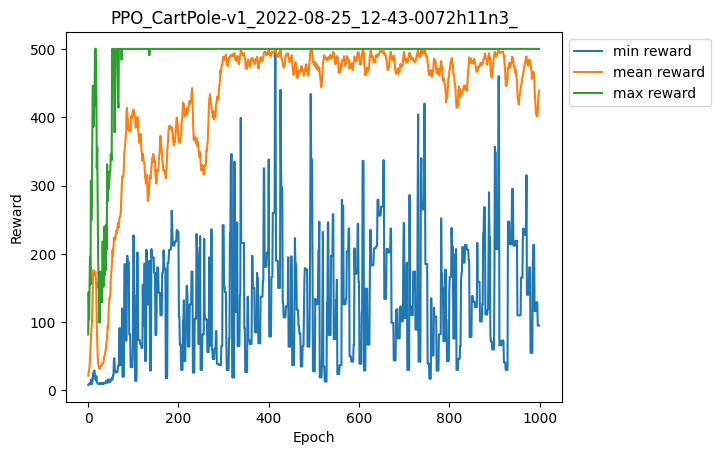

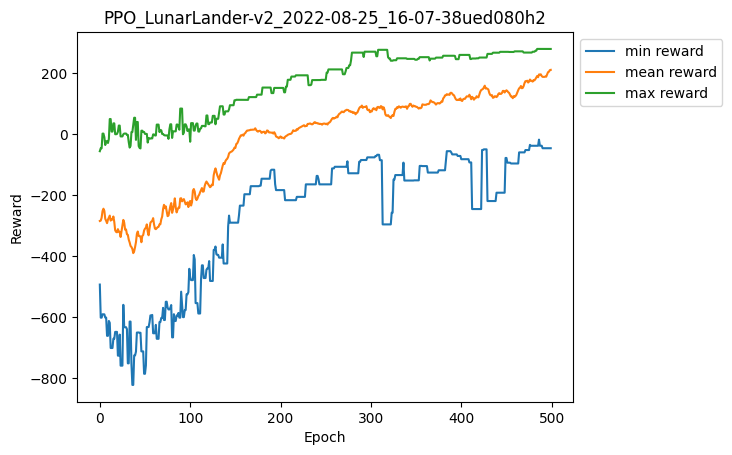

In [7]:
folder_names = [
    "PPO_CartPole-v1_2022-08-25_11-41-16_9_8oyaq",
    "PPO_CartPole-v1_2022-08-25_12-13-0843xz6def",
    "PPO_CartPole-v1_2022-08-25_12-43-0072h11n3_",
    "PPO_LunarLander-v2_2022-08-25_16-07-38ued080h2"
]
for folder in folder_names:
    plotReward(folder)
